In [9]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import statsmodels.api as sm
import seaborn as sns
from ISLP import load_data
import matplotlib.pyplot as plt

In [10]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay

# **Predicting market directions: the `Smarket` data**

## Load data and visualise features

In [11]:
Smarket = load_data('Smarket') 
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [13]:
Smarket.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [14]:
# we use the melt function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html to prepare a suitable format for the boxplot
Smarket_melt = pd.melt(Smarket.drop(columns=['Year','Today']),id_vars=['Direction'], value_vars=['Lag1','Lag2','Lag3','Lag4','Lag5','Volume'])
Smarket_melt

,Direction,variable,value
0,Up,Lag1,0.38100
1,Up,Lag1,0.95900
2,Down,Lag1,1.03200
3,Up,Lag1,-0.62300
4,Up,Lag1,0.61400
...,...,...,...
7495,Up,Volume,1.88850
7496,Down,Volume,1.28581
7497,Up,Volume,1.54047
7498,Down,Volume,1.42236


<Axes: xlabel='variable', ylabel='value'>

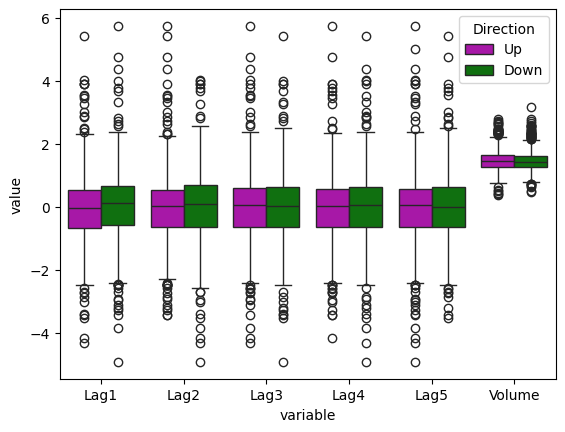

In [ ]:
sns.boxplot(x="variable", y="value",
            hue="Direction", palette=["m", "g"],
            data=Smarket_melt)

What could you observe from this plot?

## LDA

In [ ]:
X = Smarket[['Lag1', 'Lag2']]
y = Smarket['Direction']

In [ ]:
train = (Smarket.Year < 2005) 
Xtrain, Xtest = X.loc[train], X.loc[~train] 
ytrain, ytest = y.loc[train], y.loc[~train]

In [ ]:
lda = LDA()
lda.fit(Xtrain,ytrain)

LinearDiscriminantAnalysis()

In [ ]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [ ]:
lda.priors_

array([0.49198397, 0.50801603])

In [ ]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [ ]:
lda_pred = lda.predict(Xtest)

In [ ]:
confusion_table(lda_pred, ytest)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [ ]:
np.mean(lda_pred == ytest)

0.5595238095238095

In [ ]:
lda_pred_prob = lda.predict_proba(Xtest)
lda_pred_prob

array([[0.49017925, 0.50982075],
       [0.4792185 , 0.5207815 ],
       [0.46681848, 0.53318152],
       [0.47400107, 0.52599893],
       [0.49278766, 0.50721234],
       [0.49385615, 0.50614385],
       [0.49510156, 0.50489844],
       [0.4872861 , 0.5127139 ],
       [0.49070135, 0.50929865],
       [0.48440262, 0.51559738],
       [0.49069628, 0.50930372],
       [0.51199885, 0.48800115],
       [0.48951523, 0.51048477],
       [0.47067612, 0.52932388],
       [0.47445929, 0.52554071],
       [0.47995834, 0.52004166],
       [0.49357753, 0.50642247],
       [0.50308938, 0.49691062],
       [0.49788061, 0.50211939],
       [0.48863309, 0.51136691],
       [0.50065681, 0.49934319],
       [0.51087353, 0.48912647],
       [0.50399248, 0.49600752],
       [0.49163351, 0.50836649],
       [0.50417721, 0.49582279],
       [0.50267505, 0.49732495],
       [0.49140429, 0.50859571],
       [0.48059641, 0.51940359],
       [0.48827181, 0.51172819],
       [0.50621869, 0.49378131],
       [0.

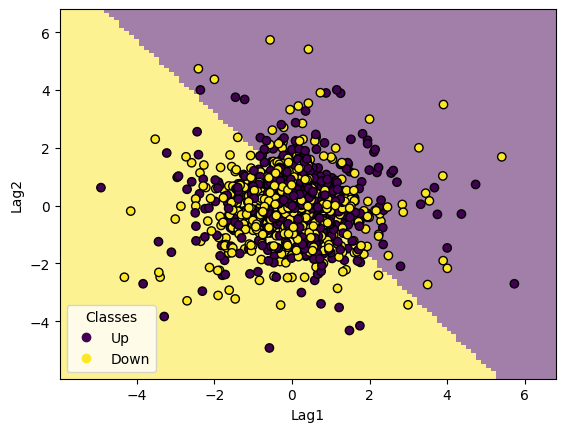

In [ ]:
# plot decision boundary
fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    lda,
    Xtrain,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="Lag1",
    ylabel="Lag2",
    shading="auto",
    alpha=0.5,
    ax=ax,
    )
# add scatter of data points
scatter = disp.ax_.scatter(Xtrain.iloc[:,0], Xtrain.iloc[:,1], c=ytrain.replace(('Up', 'Down'), (1, 0)), edgecolors="k") 
# add legend
disp.ax_.legend(
    scatter.legend_elements()[0],
    ytrain.unique(),
    loc="lower left",
    title="Classes",
    )

## QDA

In [ ]:
qda = QDA()
qda.fit(Xtrain,ytrain)

QuadraticDiscriminantAnalysis()

In [ ]:
qda_pred = qda.predict(Xtest)
confusion_table(qda_pred,ytest)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [ ]:
np.mean(qda_pred == ytest)

0.5992063492063492

In [ ]:
qda_pred_prob = qda.predict_proba(Xtest)
qda_pred_prob

array([[0.48732434, 0.51267566],
       [0.47590106, 0.52409894],
       [0.46369106, 0.53630894],
       [0.4739253 , 0.5260747 ],
       [0.49034262, 0.50965738],
       [0.49135613, 0.50864387],
       [0.49229512, 0.50770488],
       [0.48474475, 0.51525525],
       [0.48895945, 0.51104055],
       [0.48189708, 0.51810292],
       [0.49006837, 0.50993163],
       [0.50880851, 0.49119149],
       [0.48948096, 0.51051904],
       [0.46882683, 0.53117317],
       [0.47227939, 0.52772061],
       [0.47778697, 0.52221303],
       [0.49110913, 0.50889087],
       [0.50027167, 0.49972833],
       [0.49558246, 0.50441754],
       [0.48576016, 0.51423984],
       [0.49783819, 0.50216181],
       [0.50882262, 0.49117738],
       [0.50199361, 0.49800639],
       [0.48908979, 0.51091021],
       [0.50115524, 0.49884476],
       [0.5029427 , 0.4970573 ],
       [0.48859351, 0.51140649],
       [0.47736702, 0.52263298],
       [0.48754913, 0.51245087],
       [0.50318414, 0.49681586],
       [0.

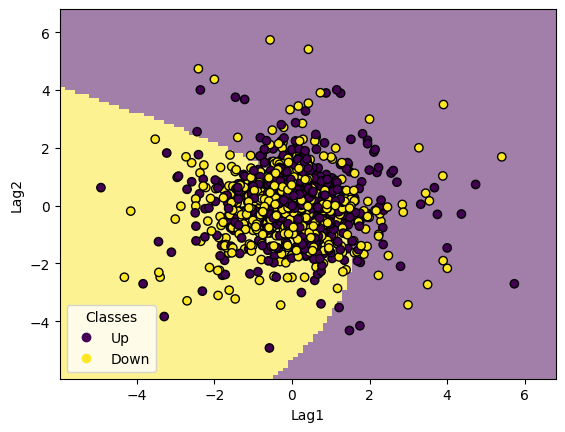

In [ ]:
# plot decision boundary
fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    qda,
    Xtrain,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="Lag1",
    ylabel="Lag2",
    shading="auto",
    alpha=0.5,
    ax=ax,
    )
# add scatter of data points
scatter = disp.ax_.scatter(Xtrain.iloc[:,0], Xtrain.iloc[:,1], c=ytrain.replace(('Up', 'Down'), (1, 0)), edgecolors="k") 
# add legend
disp.ax_.legend(
    scatter.legend_elements()[0],
    ytrain.unique(),
    loc="lower left",
    title="Classes",
    )

## Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(Xtrain,ytrain)

GaussianNB()

In [ ]:
NB.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [ ]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [ ]:
nb_pred = NB.predict(Xtest)
confusion_table(nb_pred,ytest)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [ ]:
np.mean(nb_pred == ytest)

0.5952380952380952

In [ ]:
nb_pred_prob = NB.predict_proba(Xtest)
nb_pred_prob

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413],
       [0.49121017, 0.50878983],
       [0.4921853 , 0.5078147 ],
       [0.48452749, 0.51547251],
       [0.48875624, 0.51124376],
       [0.48157179, 0.51842821],
       [0.48958781, 0.51041219],
       [0.50910287, 0.49089713],
       [0.48836745, 0.51163255],
       [0.47013577, 0.52986423],
       [0.47322167, 0.52677833],
       [0.47830144, 0.52169856],
       [0.49094329, 0.50905671],
       [0.50026186, 0.49973814],
       [0.49544145, 0.50455855],
       [0.48577498, 0.51422502],
       [0.49745783, 0.50254217],
       [0.50911006, 0.49088994],
       [0.50197202, 0.49802798],
       [0.48893946, 0.51106054],
       [0.50064207, 0.49935793],
       [0.5025187 , 0.4974813 ],
       [0.48858671, 0.51141329],
       [0.47748726, 0.52251274],
       [0.48728425, 0.51271575],
       [0.50324168, 0.49675832],
       [0.

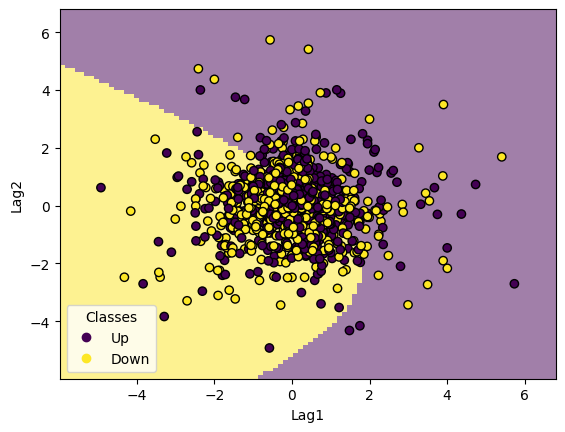

In [ ]:
# plot decision boundary
fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
    NB,
    Xtrain,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="Lag1",
    ylabel="Lag2",
    shading="auto",
    alpha=0.5,
    ax=ax,
    )
# add scatter of data points
scatter = disp.ax_.scatter(Xtrain.iloc[:,0], Xtrain.iloc[:,1], c=ytrain.replace(('Up', 'Down'), (1, 0)), edgecolors="k") 
# add legend
disp.ax_.legend(
    scatter.legend_elements()[0],
    ytrain.unique(),
    loc="lower left",
    title="Classes",
    )

In [ ]:
ytrain

0        Up
1        Up
2      Down
3        Up
4        Up
       ... 
993    Down
994      Up
995    Down
996      Up
997    Down
Name: Direction, Length: 998, dtype: object